In [1]:
test<-read.csv("speed_dating_test.csv")

In [5]:
library(dplyr)
library(magrittr)
library(ggplot2)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.5

In [2]:
summary(test)


      iid              id            gender         idg            condtn 
 Min.   :509.0   Min.   : 1.00   Min.   :0.0   Min.   : 1.00   Min.   :2  
 1st Qu.:519.8   1st Qu.: 6.00   1st Qu.:0.0   1st Qu.:11.75   1st Qu.:2  
 Median :530.5   Median :11.00   Median :0.5   Median :22.50   Median :2  
 Mean   :530.5   Mean   :11.49   Mean   :0.5   Mean   :22.50   Mean   :2  
 3rd Qu.:541.2   3rd Qu.:17.00   3rd Qu.:1.0   3rd Qu.:33.25   3rd Qu.:2  
 Max.   :552.0   Max.   :22.00   Max.   :1.0   Max.   :44.00   Max.   :2  
                 NA's   :1                                                
      wave        round       position       positin1        order     
 Min.   :21   Min.   :22   Min.   : 1.0   Min.   : 1.0   Min.   : 1.0  
 1st Qu.:21   1st Qu.:22   1st Qu.: 6.0   1st Qu.: 6.0   1st Qu.: 6.0  
 Median :21   Median :22   Median :11.5   Median :11.5   Median :11.5  
 Mean   :21   Mean   :22   Mean   :11.5   Mean   :11.5   Mean   :11.5  
 3rd Qu.:21   3rd Qu.:22   3rd Qu.:17.0 

In [8]:
str(test)

'data.frame':	968 obs. of  192 variables:
 $ iid     : int  509 509 509 509 509 509 509 509 509 509 ...
 $ id      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ idg     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ condtn  : int  2 2 2 2 2 2 2 2 2 2 ...
 $ wave    : int  21 21 21 21 21 21 21 21 21 21 ...
 $ round   : int  22 22 22 22 22 22 22 22 22 22 ...
 $ position: int  21 21 21 21 21 21 21 21 21 21 ...
 $ positin1: int  21 21 21 21 21 21 21 21 21 21 ...
 $ order   : int  8 5 20 7 4 19 9 14 18 11 ...
 $ partner : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pid     : int  531 532 533 534 535 536 537 538 539 540 ...
 $ int_corr: num  -0.12 0.03 0.37 0.11 0.39 0.84 0.67 0.36 0.58 0.1 ...
 $ samerace: int  1 1 0 0 0 0 1 0 0 0 ...
 $ age_o   : int  25 26 26 24 23 29 22 32 22 24 ...
 $ race_o  : int  4 4 2 6 2 2 4 2 2 2 ...
 $ pf_o_att: int  15 25 25 30 23 30 20 50 30 20 ...
 $ pf_o_sin: int  30 20 25 30 14 20 5 0 10 15 ...
 $ pf_o_int: int  20 20 25 30 19 20 25 10 20 20 ...
 $ pf_

In [30]:
test_selected<-test %>% 
    select(idg,gender,int_corr,samerace,age_o ,race_o,age,field_cd,undergra,mn_sat,race,zipcode,income,goal,career_c) 

In [99]:
test_selected<-test_selected %>%
    mutate_each(funs(as.factor),gender,samerace,race_o,field_cd,race,goal ,career_c) %>%
    mutate_each(funs(as.numeric),income)
#test_selected<-test_selected %>%
#    mutate_each(funs(as.factor),gender,samerace,race_o,field_cd,race,goal ,career_c) %>% 
#    mutate_each(funs(as.factor(order=True)),income)

In [100]:
str(test_selected)

'data.frame':	968 obs. of  15 variables:
 $ idg     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ int_corr: num  -0.12 0.03 0.37 0.11 0.39 0.84 0.67 0.36 0.58 0.1 ...
 $ samerace: Factor w/ 2 levels "0","1": 2 2 1 1 1 1 2 1 1 1 ...
 $ age_o   : int  25 26 26 24 23 29 22 32 22 24 ...
 $ race_o  : Factor w/ 5 levels "1","2","3","4",..: 4 4 2 5 2 2 4 2 2 2 ...
 $ age     : int  28 28 28 28 28 28 28 28 28 28 ...
 $ field_cd: Factor w/ 12 levels "1","2","3","4",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ undergra: Factor w/ 43 levels "Beijing University",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ mn_sat  : Factor w/ 18 levels "","1,188.00",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ race    : Factor w/ 5 levels "1","2","3","4",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ zipcode : Factor w/ 38 levels "","0","10,024",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ income  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ goal    : Factor w/ 4 levels "1","2","3","5": 2 2 2 2 2 2 2 2 2 2 ...
 $ career_c: 

# Race vs Gender
Female白人9人;拉丁4人;亞州人7人;美國原住民2人
Male 黑人1人; 白人13人;亞洲人7人;美國原住民1人

?如何將table值除以22
?如何在圖上加上註解

   
      1   2   3   4   6
  0   0 198  88 154  44
  1  22 286   0 154  22

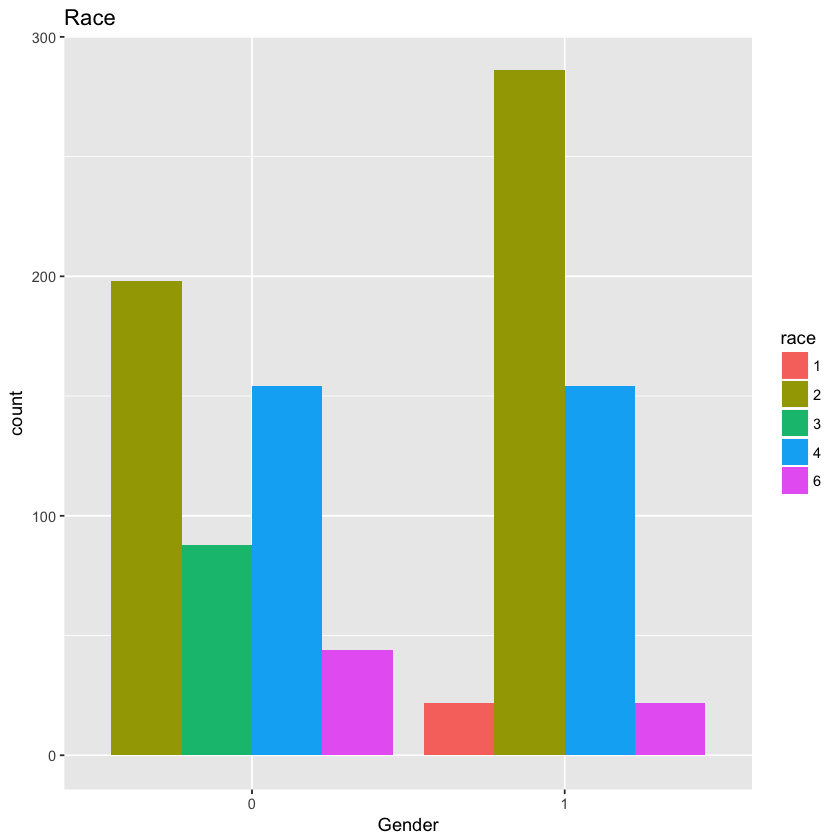

In [94]:
table(test_selected$gender,test_selected$race)
ggplot(data=test_selected,aes(gender))+ 
      geom_bar(aes(fill=race),position = "dodge") +
        ggtitle("Race") +
        xlab("Gender")
#Female白人9人;拉丁4人;亞州人7人;美國原住民2人
#Male 黑人1人; 白人13人;亞洲人7人;美國原住民1人
#Female=0;Male=1
#Black/African American=1;
#European/Caucasian-American=2
#Latino/Hispanic American=3
#Asian/Pacific Islander/Asian-American=4
#Native American=5
#Other=6

# Race vs Goal

   
      1   2   3   5
  0 154 286   0  44
  1 308 132  44   0

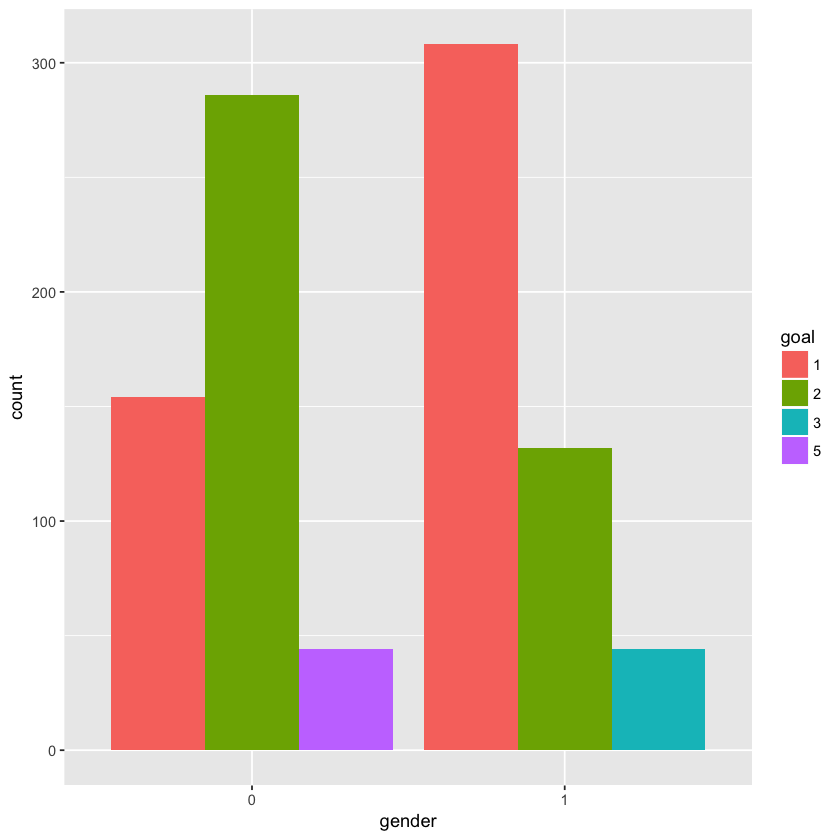

In [92]:
table(test_selected$gender,test_selected$goal)
ggplot(data=test_selected,aes(gender))+ 
      geom_bar(aes(fill=goal),position = "dodge")
#Seemed like a fun night out=1
#To meet new people=2
#To get a date=3
#Looking for a serious relationship=4
#To say I did it=5
#Other=6

# Gender vs Age

Warning message:
: Removed 22 rows containing non-finite values (stat_boxplot).

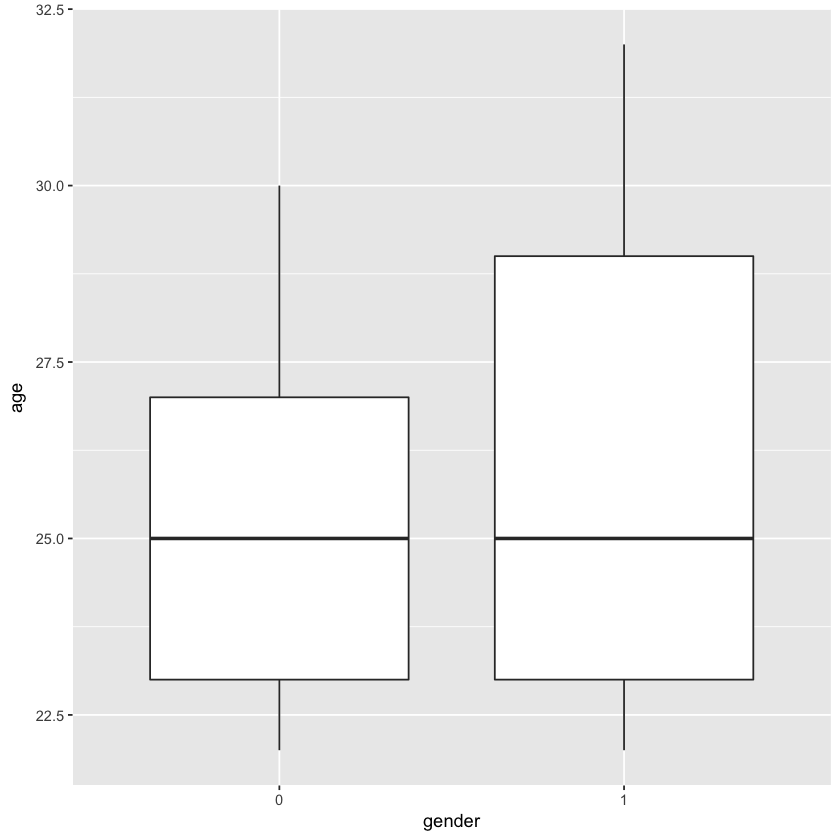

In [68]:

ggplot(data=test_selected,aes(gender,age)) +
geom_boxplot()

In [ ]:
#field_cd

# Gender vs Field(職業)

   
      1   2   3   4   5   6   8   9  10  11  15  18
  0  22   0  22  22  66  44  22  44  22 110 110   0
  1  22  22   0   0 264   0 132   0  22   0   0  22

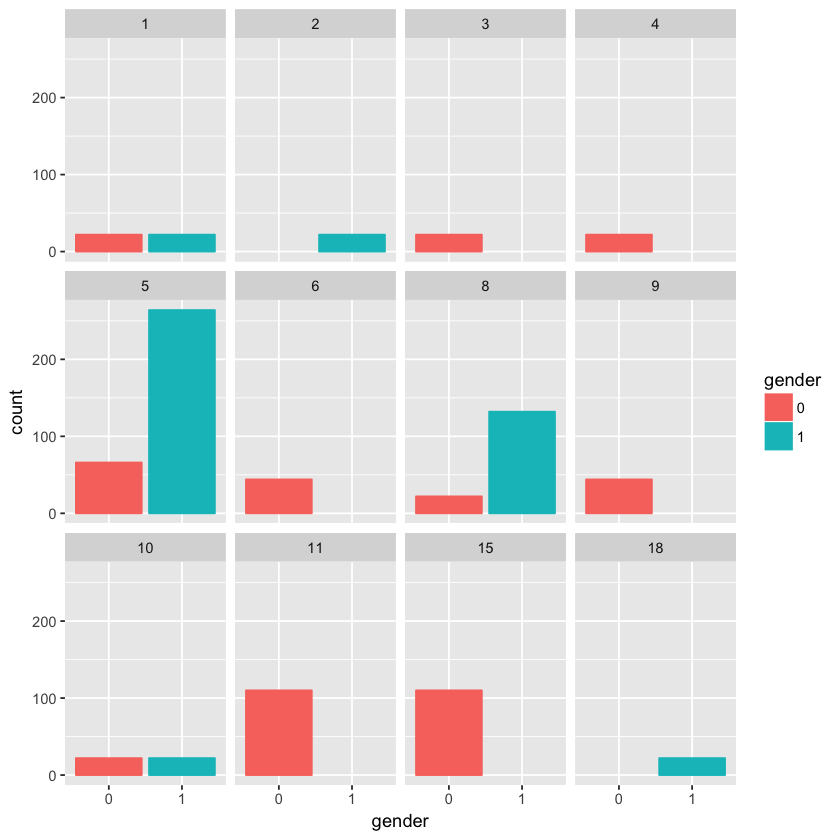

In [90]:
table(test_selected$gender,test_selected$field_cd)
ggplot(data=test_selected,aes(gender,colour=gender))+ 
      geom_bar(aes(fill=gender))+
        facet_wrap(~field_cd )

# Gender vs undergrad

In [95]:
table(test_selected$gender,test_selected$undergra)

   
    Beijing University California State University Los Angeles Columbia
  0                 22                                      22        0
  1                  0                                       0       22
   
    Columbia University ColumbiaU Conneticut College COOPER UNION
  0                  22        22                 22            0
  1                   0         0                  0           22
   
    Cooper Union, Bard college, and SUNY Purchase Cornell University
  0                                             0                 22
  1                                            22                  0
   
    Dartmouth College Ecole Normale Sup\x8erieure, Paris Georgetown
  0                 0                                  0         22
  1                22                                 22          0
   
    Hamilton College Harvard Loyola College LUISS, Rome Naples, Italy
  0               22       0              0           0             0
  1            

# Gender vs Income

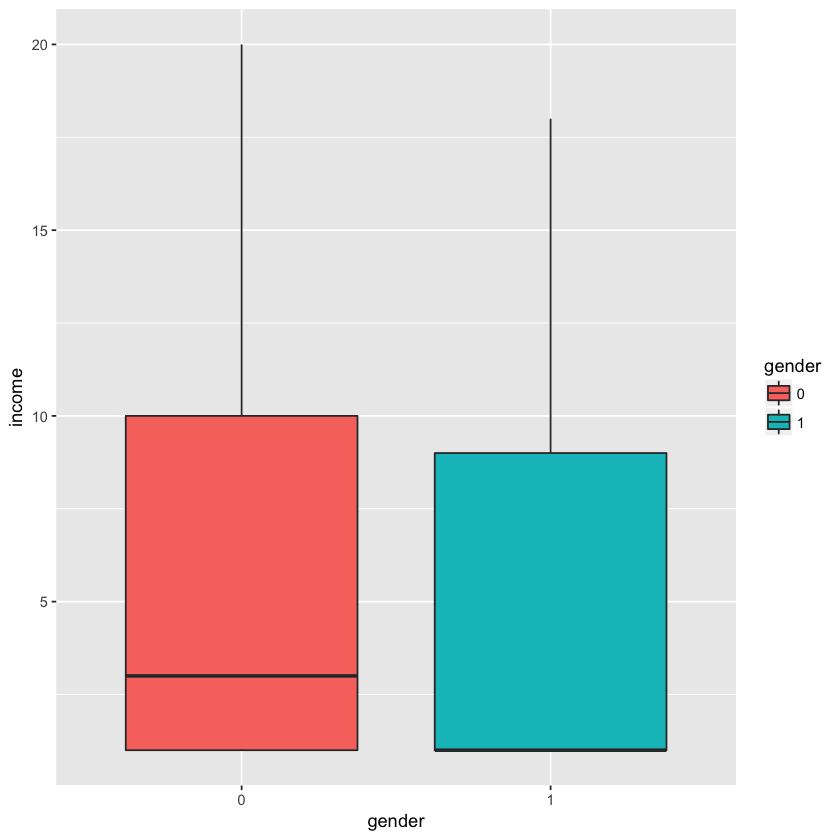

In [103]:
ggplot(data=test_selected,aes(gender,income)) +
geom_boxplot(aes(fill=gender))


In [104]:
test_selected<-test_selected %>%
    mutate_each(funs(as.factor(order=True)),income)

ERROR: Error in eval(expr, envir, enclos): unused argument (order = True)
